In [1]:
from sympy import symbols, Eq, solve
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
C_G1P = 20 #-- for model, 20 mM -- for comparison to oikonomakos
C_AMP = 1 #0.5 
C_P = 5
Pool = 1#5
C_ATP = 0#4.95
C_G6P = 0.0

In [3]:
atp_all = np.linspace(0,Pool,100)
G1P_all = np.linspace(0,25,100)
G6P_all = np.linspace(0,1.6,100)
P_all = np.linspace(4,20,100)

In [4]:
amp_all = []
for i in atp_all:
    atp = i
    p = Pool
    
    adp = symbols('x')
    eq1 = atp*(p-atp-adp)-adp**2
    adp = max(solve(eq1))

    amp = symbols('x')
    eq2 = amp -p + atp + adp
    amp = float(solve(eq2)[0])
    adp = float(adp)
    amp_all.append(amp)

# Belovolova model

In [5]:
#For reverse reaction (glycogen synthesis)
k_r = 1 #5# концентрация в клетке, было 79*60
R = 10 #glycogen
K_R = 1.2
#S_r = 0.05 #g1p
A = C_AMP
a = 0.2
K_a1_prime = 0.185
K_a2 = 0.024
K_s1_prime_r = 10.2
K_s2_r = 2 
I_1 = 3 # glucose
#I_2 = 0.2 # g6p
#I_3 = 2 #atp
K_i1 = 3
K_i2 = 0.02
K_i3 = 5
E_0 = 1#GPb
K_s1_r = K_s1_prime_r * (1 + I_1/K_i1)

In [6]:
#For forward reaction (glycogen degradation)
k_f =  1#5#39*60
#S_f = 0.05 #Pi
K_s1_prime_f = 20.4
K_s2_f = 4 
K_s1_f = K_s1_prime_f * (1 + I_1/K_i1)

In [7]:
def v_bel(I_3, S_f, S_r, I_2):
    K_a1 = K_a1_prime * (1 + I_2/K_i2) * (1 + I_3/K_i3)
    
    atp = I_3
    p = Pool
    
    adp = symbols('x')
    eq1 = atp*(p-atp-adp)-adp**2
    adp = max(solve(eq1))

    amp = symbols('x')
    eq2 = amp -p + atp + adp
    amp = float(solve(eq2)[0])
    adp = float(adp)
    
    A = amp
    
    v_bel = ((2 * k_f * R)/(K_R + R) * (S_f**2 * A**2)/(a**2 * (K_a1 * K_a2 * K_s1_f * K_s2_f + 
                                                       2 * K_a2 * K_s2_f * (
                                                               K_a1 * S_f  + K_s1_f * A + S_f * A
                                                               ) +
                                                       K_a1 * K_a2 * S_f**2 +
                                                       K_s1_f * K_s2_f * A**2
                                                      )
                                               +  2 * a * S_f * A * (
                                               K_a2 * K_s2_f + K_a2 * S_f + K_s2_f * A
                                               ) + S_f**2 * A**2
                                              ) * E_0) - ((2 * k_r * R)/(K_R + R) * (S_r**2 * A**2)/(a**2 * (K_a1 * K_a2 * K_s1_r * K_s2_r + 
                                                       2 * K_a2 * K_s2_r * (
                                                               K_a1 * S_r  + K_s1_r * A + S_r * A
                                                               ) +
                                                       K_a1 * K_a2 * S_r**2 +
                                                       K_s1_r * K_s2_r * A**2
                                                      )
                                               +  2 * a * S_r * A * (
                                               K_a2 * K_s2_r + K_a2 * S_r + K_s2_r * A
                                               ) + S_r**2 * A**2
                                              ) * E_0)
    #K_s1 = K_s1_prime * (1 + I_1/K_i1)
    #K_a1 = K_a1_prime * (1 + I_2/K_i2) * (1 + I_3/K_i3)
    return(v_bel)

### AMP Bel

In [8]:
V_bel_amp = []
for ATP in atp_all:
    atp = ATP
    p = Pool
    
    adp = symbols('x')
    eq1 = atp*(p-atp-adp)-adp**2
    adp = max(solve(eq1))

    amp = symbols('x')
    eq2 = amp -p + atp + adp
    amp = float(solve(eq2)[0])
    adp = float(adp)
    
    A = amp
    V_bel_amp.append(v_bel(ATP, C_P, C_G1P, C_G6P))

### G1P Bel

In [9]:
V_bel_g1p = []
for S in G1P_all:
    atp = C_ATP
    p = Pool
    
    adp = symbols('x')
    eq1 = atp*(p-atp-adp)-adp**2
    adp = max(solve(eq1))

    amp = symbols('x')
    eq2 = amp -p + atp + adp
    amp = float(solve(eq2)[0])
    adp = float(adp)
    
    A = amp
    V_bel_g1p.append(v_bel(Pool - C_AMP, C_P, S, C_G6P))

### G6P Bel

In [10]:
V_bel_g6p = []
for g6p in G6P_all:
    atp = C_ATP
    p = Pool
    
    adp = symbols('x')
    eq1 = atp*(p-atp-adp)-adp**2
    adp = max(solve(eq1))

    amp = symbols('x')
    eq2 = amp -p + atp + adp
    amp = float(solve(eq2)[0])
    adp = float(adp)
    
    A = amp
    V_bel_g6p.append(v_bel(Pool - C_AMP, C_P, C_G1P, g6p))

### P Bel

In [11]:
V_bel_p = []
for S in P_all:
    V_bel_p.append(v_bel(Pool - C_AMP, S, C_G1P, C_G6P))

Figures for Belovolova formulas

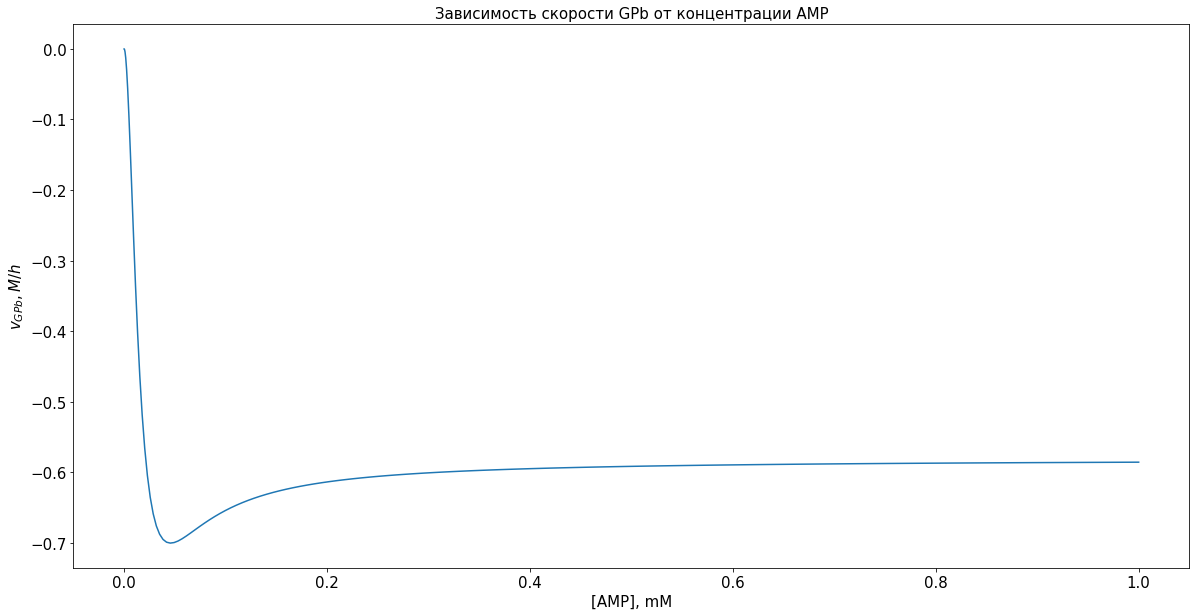

In [12]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(amp_all, V_bel_amp)
plt.xlabel('[AMP], mM', fontsize = 15)
#plt.xlim([-0.01, 1])
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
#plt.legend(('Palm','Kushmerick', 'Belovolova'), fontsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Зависимость скорости GPb от концентрации AMP', fontsize = 15)
plt.show()

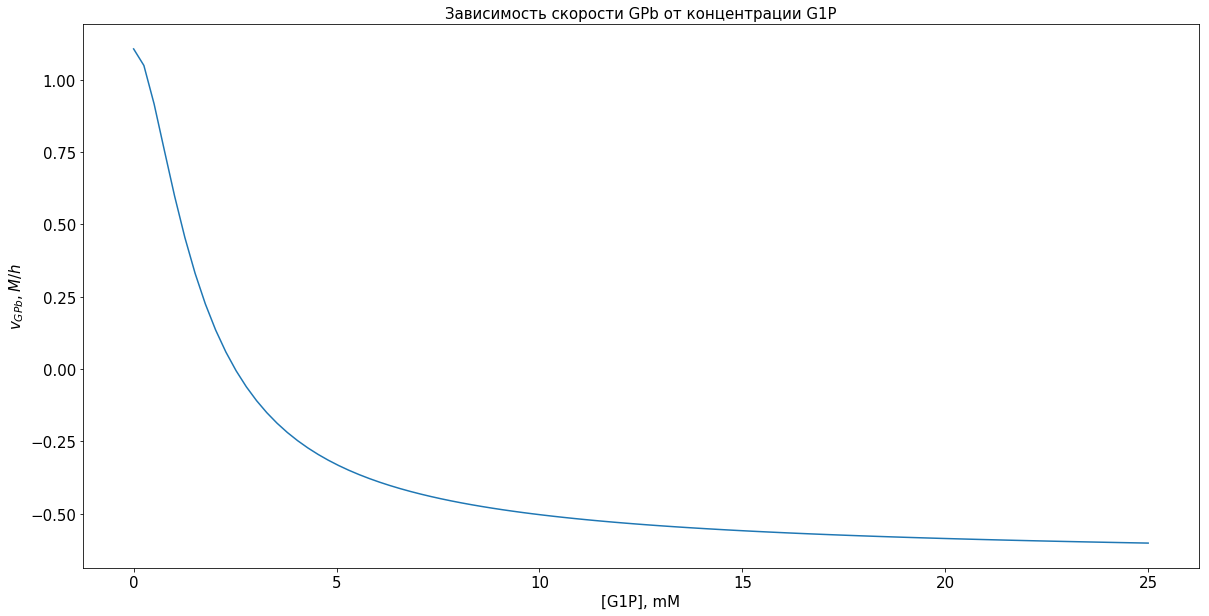

In [13]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(G1P_all,V_bel_g1p)
plt.xlabel('[G1P], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
#plt.legend(('Palm','Kushmerick', 'Belovolova'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации G1P', fontsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

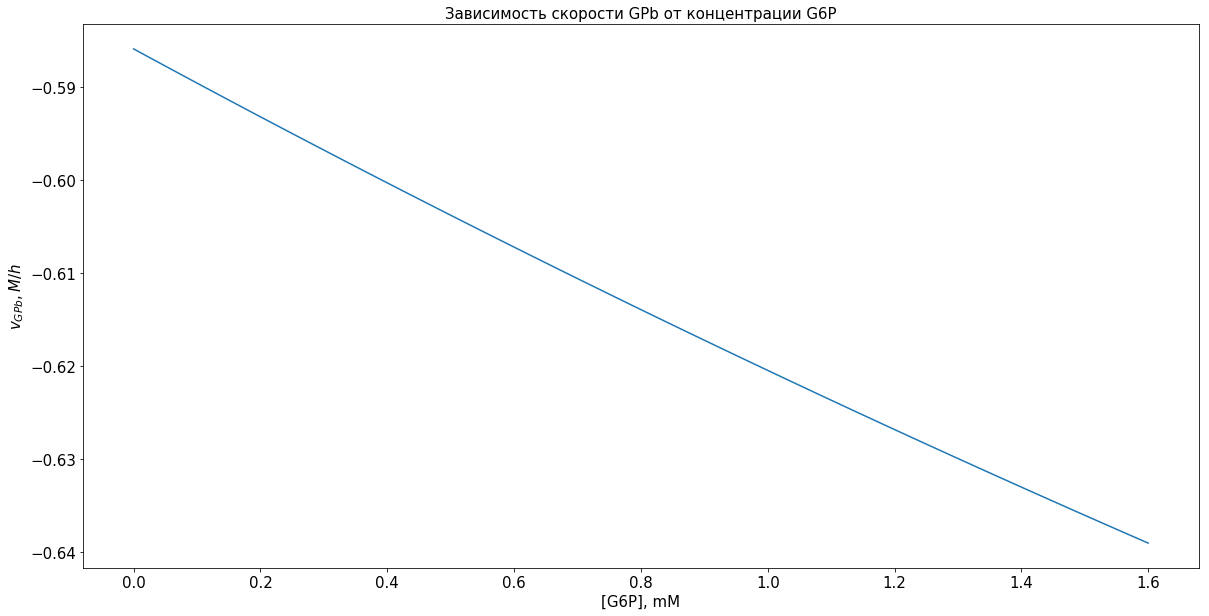

In [14]:
plt.figure(figsize = (20,10))

plt.plot(G6P_all,V_bel_g6p)
plt.xlabel('[G6P], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
#plt.legend(('Palm', 'Belovolova'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации G6P', fontsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

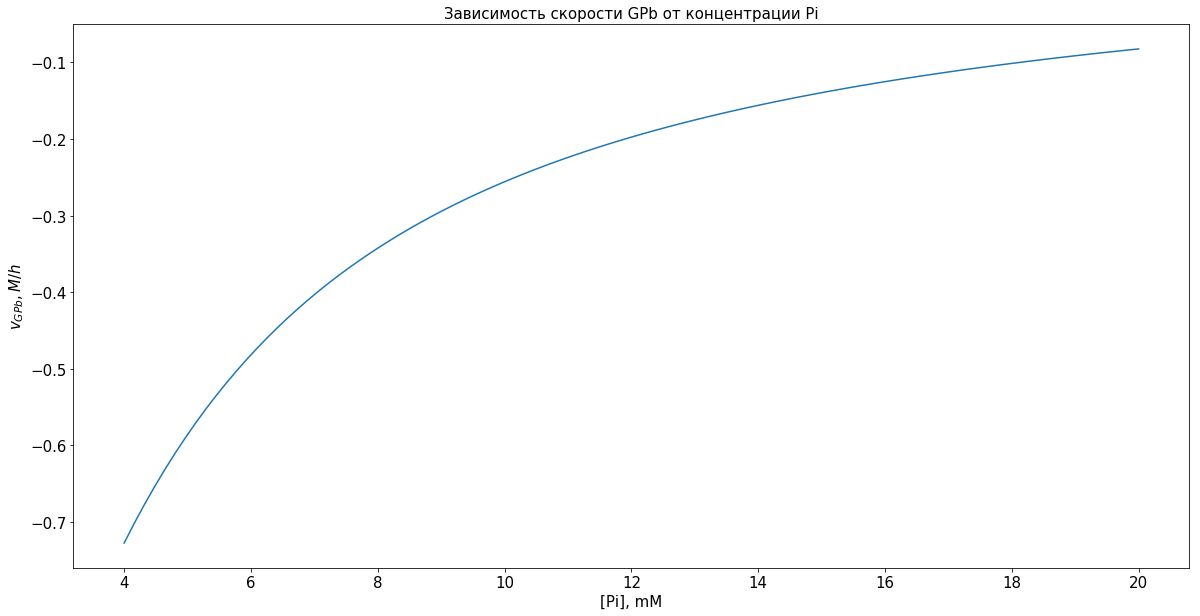

In [15]:
plt.figure(figsize = (20,10))

plt.plot(P_all,V_bel_p)
plt.xlabel('[Pi], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
#plt.legend(('Palm','Kushmerick', 'Belovolova'), fontsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Зависимость скорости GPb от концентрации Pi', fontsize = 15)
plt.show()

# Palm Model

In [16]:
K_rpi = 2.0821
k_catr = 1
GP_a = 0
GP_b = 1 #5 # vmax[M/h]
n = 2 # hill coefficent, number of subunits
#Pi = 0.5 #
#G1P = 0.05
#G6P = 0.2
#AMP = amp
#ATP = 2
K_rg1p= 0.6671
L_u = 0
L_t = 34.741
K_upi = 4.3177
K_ug1p = 82.016
K_ug6p = 0.5551
K_ramp = 0.0033581
K_rg6p = 7.4174
K_tpi = 41.532
K_tg1p = 27.923
K_tamp = 0.525
K_tg6p = 0.2685
K_tatp = 3.8991
# k_catr * GP_b = 26.7 or 38.2 mkMol/(min*mg) for Amp and g1p (?)

In [17]:
def v_gp_Palm(G1P, ATP, Pi, G6P):
    atp = ATP
    p = Pool
    
    adp = symbols('x')
    eq1 = atp*(p-atp-adp)-adp**2
    adp = max(solve(eq1))

    amp = symbols('x')
    eq2 = amp -p + atp + adp
    amp = float(solve(eq2)[0])
    adp = float(adp)
    
    AMP = amp
    v_gp_Palm = ((
        (k_catr * GP_a * n * Pi/K_rpi * (1 + Pi/K_rpi + G1P/K_rg1p)**(n-1))/(
            (1 + Pi/K_rpi + G1P/K_rg1p)**n +
            L_u * (1 + Pi/K_upi + G1P/K_ug1p)**n * (
                (1 + G6P/K_ug6p)/(1 + AMP/K_ramp + G6P/K_rg6p)
                )**n
            )
        ) + 
        (
        (k_catr * GP_b * n * Pi/K_rpi * (1 + Pi/K_rpi + G1P/K_rg1p)**(n-1))/
        (
            (1 + Pi/K_rpi + G1P/K_rg1p)**n + L_t * (1 + Pi/K_tpi + G1P/K_tg1p)**n *
            ((1 + AMP/K_tamp + G6P/K_tg6p)/(1 + AMP/K_ramp + G6P/K_rg6p))**n * 
            (1 + ATP/K_tatp)**n
        )
        ))
    return(v_gp_Palm)

### G1P Palm

In [18]:
V_palm_g1p = []
for G1P in G1P_all:
    V_palm_g1p.append(v_gp_Palm(G1P, Pool - C_AMP, C_P, C_G6P))

### G6P Palm

In [19]:
V_palm_g6p = []
for g6p in G6P_all:
    V_palm_g6p.append(v_gp_Palm(C_G1P, Pool - C_AMP, C_P, g6p))

### $P_i$ Palm

In [20]:
V_palm_p = []
for Pi in P_all:
    V_palm_p.append(v_gp_Palm(C_G1P, Pool - C_AMP, Pi, C_G6P))

### AMP Palm

In [21]:
V_palm_amp = []
for ATP in atp_all:
    V_palm_amp.append(v_gp_Palm(C_G1P, ATP, C_P, C_G6P))

# Kushmerik model

In [22]:
V_maxf = 1 #5 #mol/(l*h)
GLY = 10
#P_i= 4.1
K_iglyf = 15
K_pi = 0.2
#G1P = 
# AMP = 
K_iglyb = 4.4
K_g1p = 1.5
K_ipi = 4.6
K_ig1p = 7.4
K_eqgp = 16.62
nH = 1.75
K_primeAMP = 0.0000019
K_glyf = 1.7
V_maxr = V_maxf * K_iglyb * K_g1p/(K_glyf * K_pi * K_eqgp)

In [23]:
def v_gpb_Kush(G1P, AMP, P_i):
    v_gpb_Kush = (
    (
    V_maxf * (GLY * P_i/(K_iglyf * K_pi))
    - V_maxr * (GLY * G1P/(K_iglyb * K_g1p)))
    /(
    1 + GLY/K_iglyf + P_i/K_ipi + GLY/K_iglyb + G1P/K_ig1p +
        GLY * P_i/(K_iglyf * K_pi) + GLY * G1P/(K_iglyb * K_g1p)
    )
    ) * (
    (
    (AMP**(nH))/K_primeAMP
    )/(
    1 + (AMP**(nH))/K_primeAMP
    )
    )

    
    return(v_gpb_Kush)

### G1P Kushmerik

In [24]:
V_kush_g1p = []
for G1P in G1P_all:
    V_kush_g1p.append(v_gpb_Kush(G1P, C_AMP, C_P))

### AMP Kushmerik

In [25]:
V_kush_amp = []
for AMP in amp_all:
    V_kush_amp.append(v_gpb_Kush(C_G1P, AMP, C_P))

### $P_i$ Kushmerik

In [26]:
V_kush_p = []
for P in P_all:
    V_kush_p.append(v_gpb_Kush(C_G1P, C_AMP, P))

# 3 models in one figure

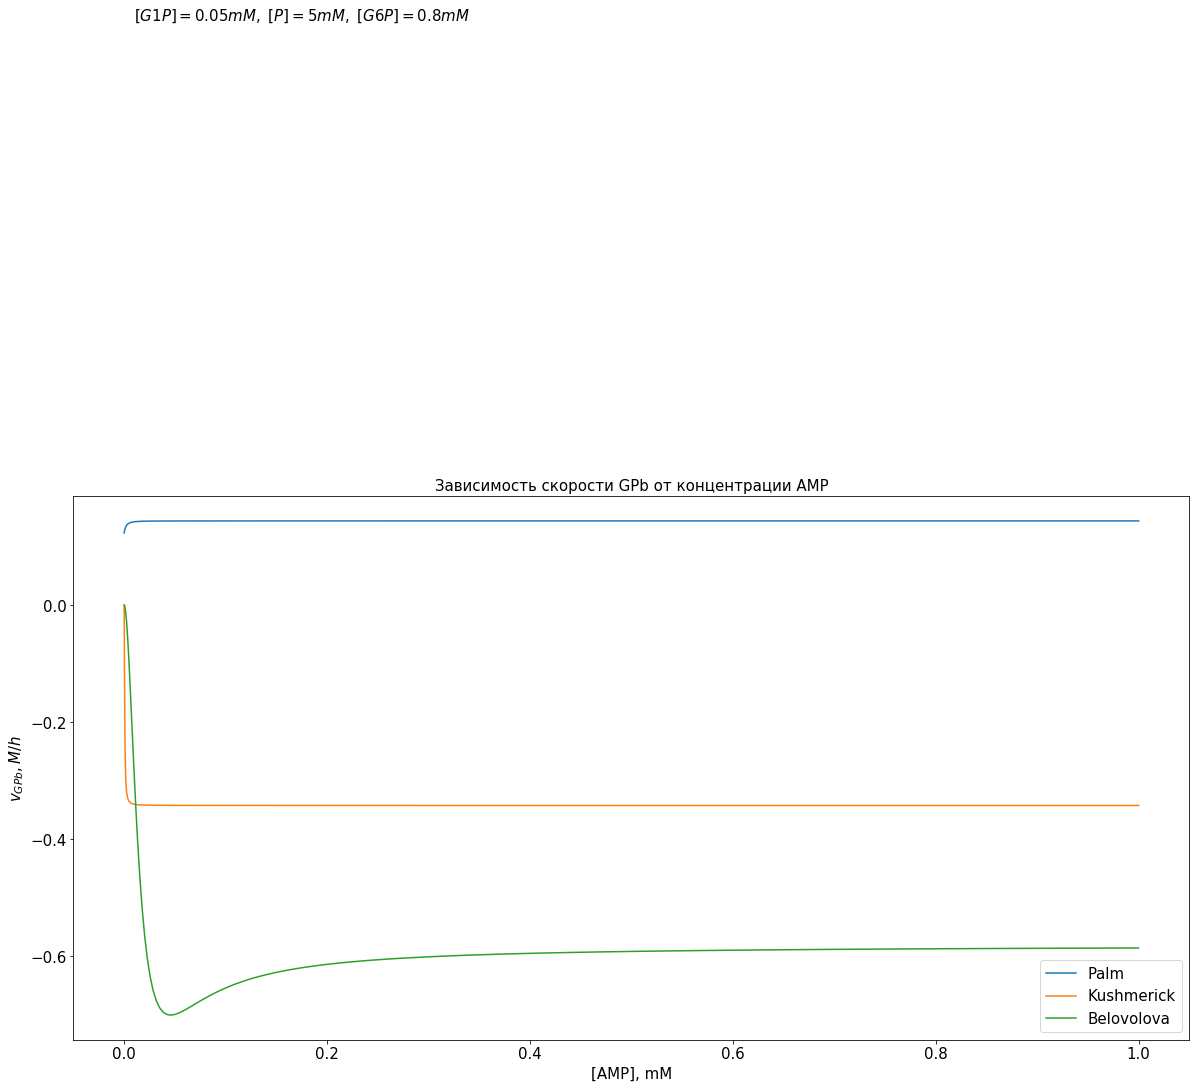

In [27]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(amp_all,V_palm_amp)
plt.plot(amp_all,V_kush_amp)
plt.plot(amp_all, V_bel_amp)
plt.xlabel('[AMP], mM', fontsize = 15)
#plt.xlim([-0.01, 1])
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.text(0.01, 1, r'$[G1P]=0.05mM,\ [P]=5mM,\ [G6P] = 0.8mM$', fontsize=15)
plt.legend(('Palm','Kushmerick', 'Belovolova'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации AMP', fontsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

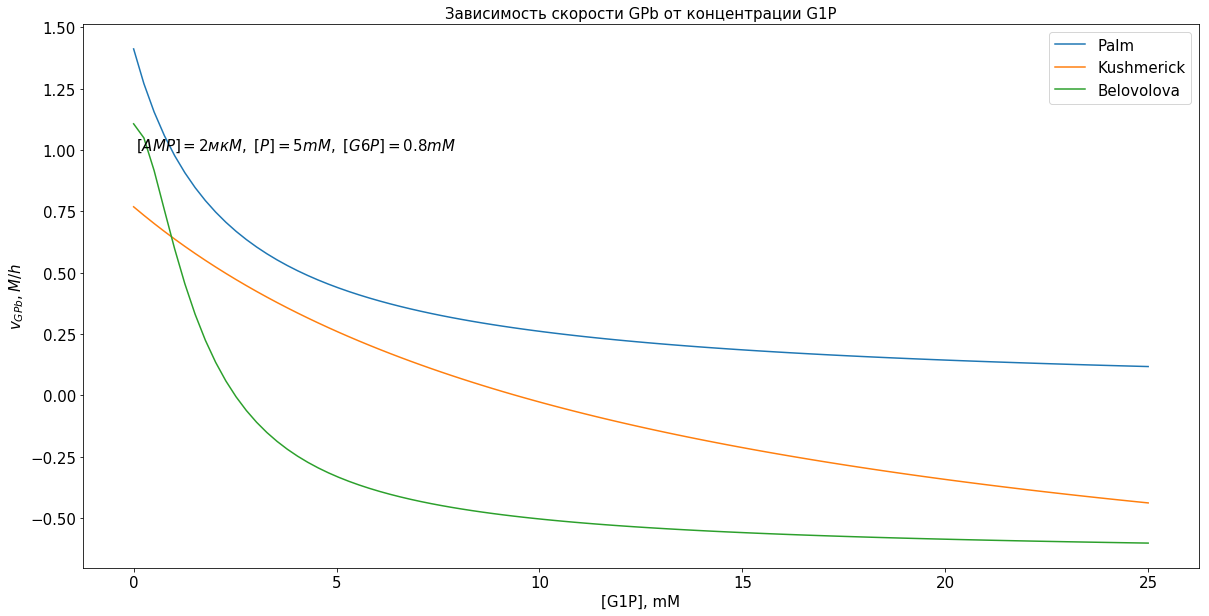

In [28]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(G1P_all,V_palm_g1p)
plt.plot(G1P_all,V_kush_g1p)
plt.plot(G1P_all,V_bel_g1p)
plt.xlabel('[G1P], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.text(0.07, 1, r'$[AMP]=2мкM,\ [P]=5mM,\ [G6P] = 0.8mM$', fontsize=15)
plt.legend(('Palm','Kushmerick', 'Belovolova'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации G1P', fontsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

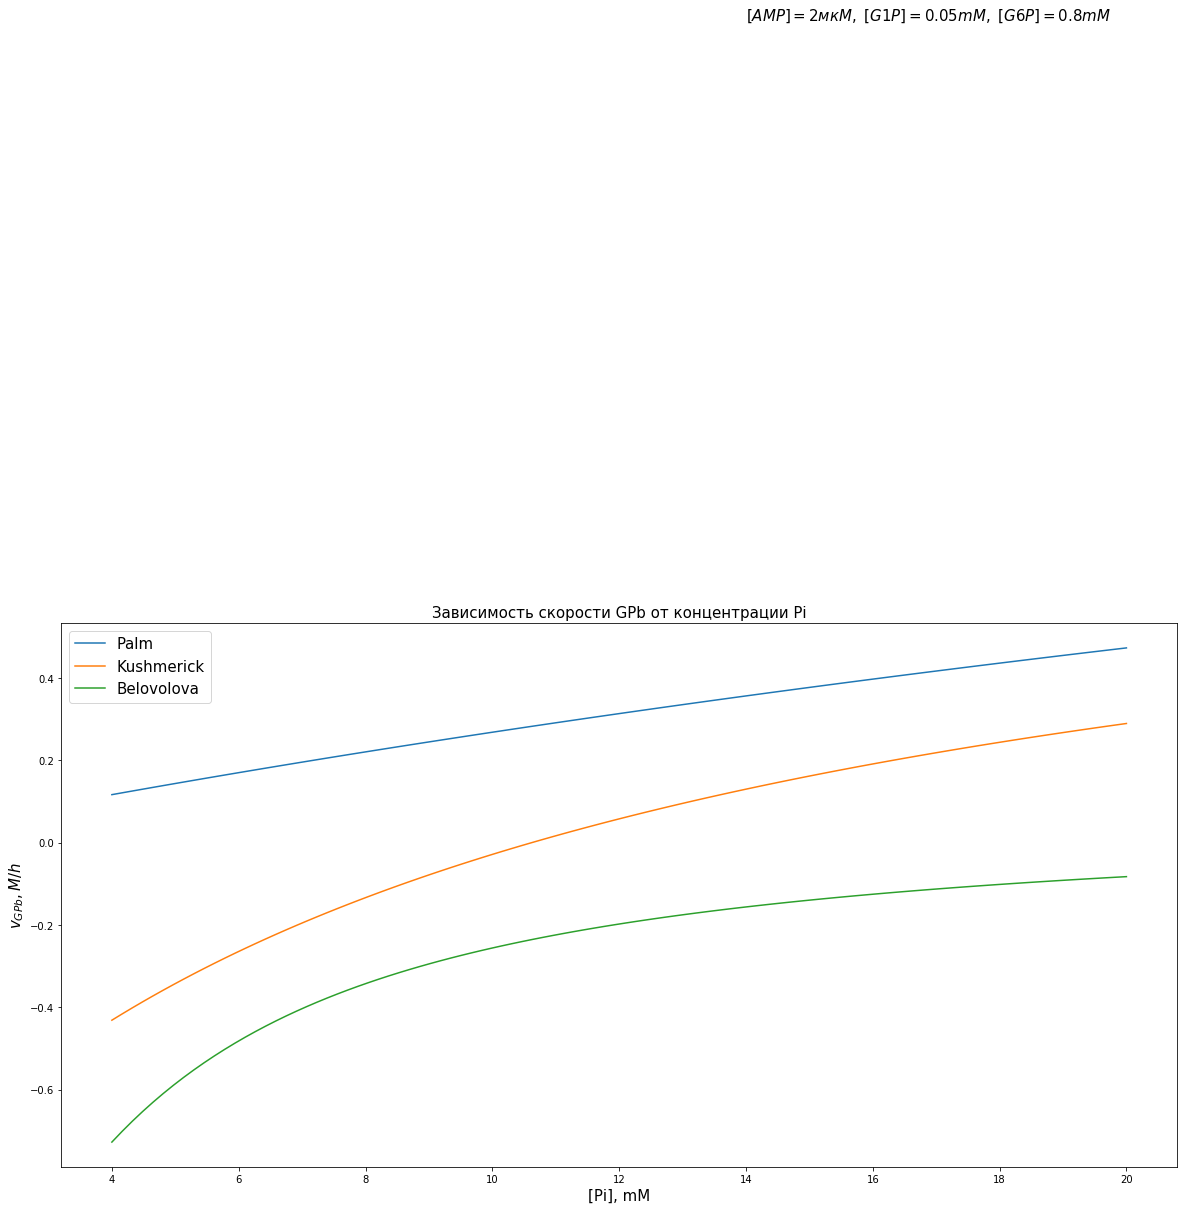

In [29]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(P_all,V_palm_p)
plt.plot(P_all,V_kush_p)
plt.plot(P_all,V_bel_p)
plt.xlabel('[Pi], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('Palm','Kushmerick', 'Belovolova'), fontsize = 15)
plt.text(14, 2, r'$[AMP]=2мкM,\ [G1P]=0.05mM,\ [G6P] = 0.8mM$', fontsize=15)
plt.title('Зависимость скорости GPb от концентрации Pi', fontsize = 15)
plt.show()

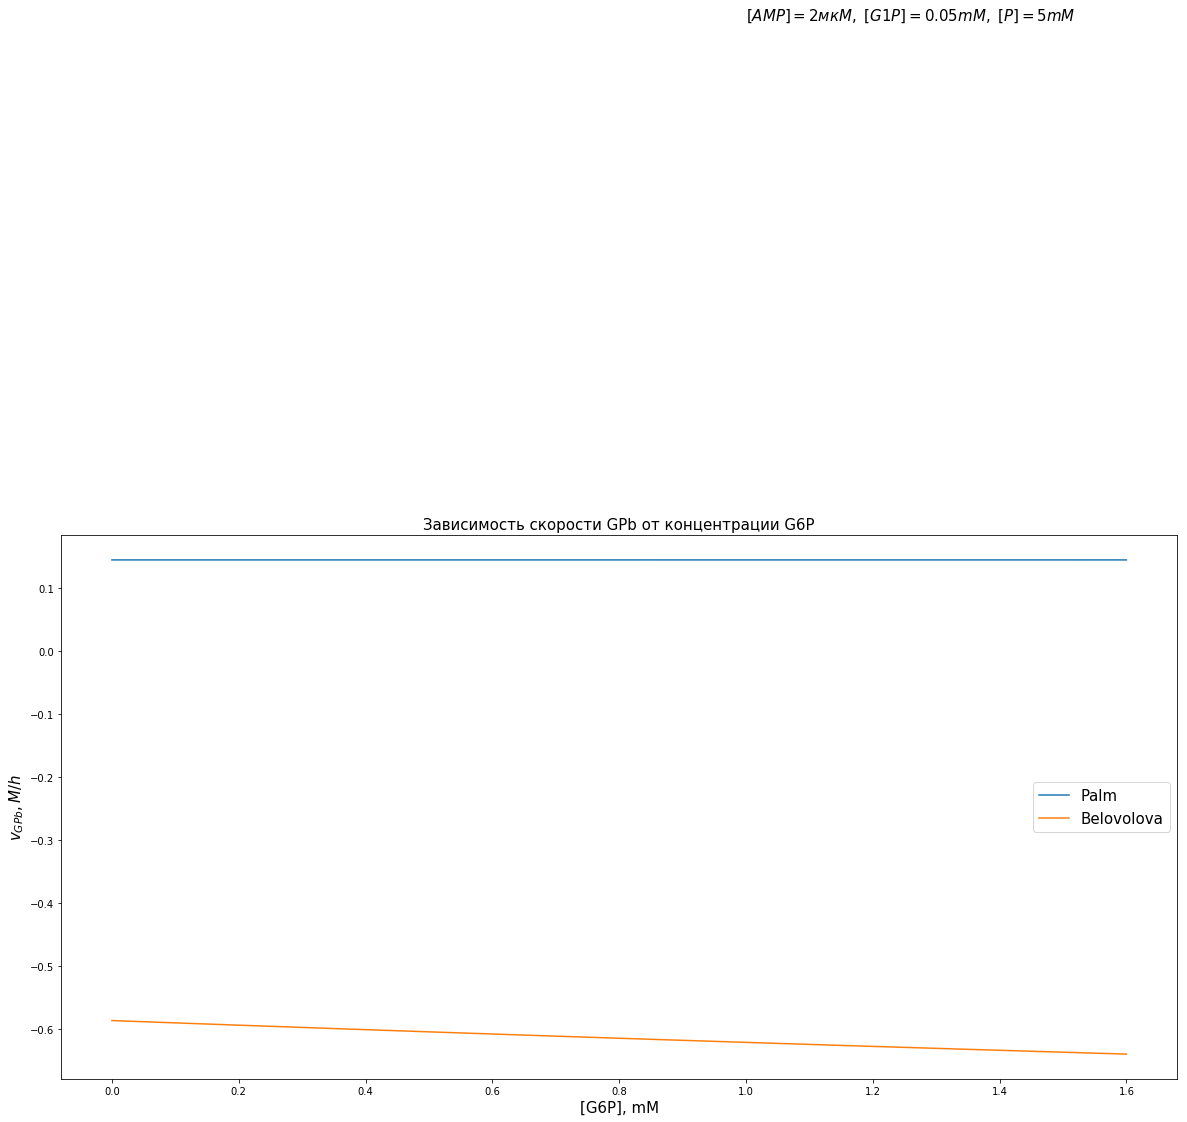

In [30]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(G6P_all,V_palm_g6p)
plt.plot(G6P_all,V_bel_g6p)
plt.xlabel('[G6P], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('Palm', 'Belovolova'), fontsize = 15)
plt.text(1, 1, r'$[AMP]=2мкM,\ [G1P]=0.05mM,\ [P] = 5mM$', fontsize=15)
plt.title('Зависимость скорости GPb от концентрации G6P', fontsize = 15)
plt.show()

# Experimental data

## Oikonomakos

In [31]:
v_amp_oi_05g6p = pd.DataFrame(data = {'amp' : [1.04,0.20,0.08,0.04],'v' : [0.0106,0.0021,0.0005,0.0002]})
v_amp_oi_03g6p = pd.DataFrame(data = {'amp' : [1.09,0.20,0.08,0.04],'v' : [0.0223,0.0027,0.0009,0.0002]})
v_amp_oi_02g6p = pd.DataFrame(data = {'amp' : [0.99,0.20,0.08,0.04],'v' : [0.0225,0.0031,0.0011,0.0003]})
v_amp_oi_01g6p = pd.DataFrame(data = {'amp' : [1.15,0.20,0.08,0.04],'v' : [0.0221,0.0080,0.0015,0.0004]})
v_amp_oi_00g6p = pd.DataFrame(data = {'amp' : [1.0916,0.08,0.04],'v' : [0.0500,0.0024,0.0001]})

In [32]:
v_g1p_oi_3g6p = pd.DataFrame(data = {'g1p' : [20.000,10.000,5.988,4.000,3.003],'v' : [0.824,0.667,0.400,0.311,0.226]})
v_g1p_oi_2g6p = pd.DataFrame(data = {'g1p' : [20.000,10.000,5.988,4.000,3.003],'v' : [0.933,0.778,0.560,0.452,0.326]})
v_g1p_oi_08g6p = pd.DataFrame(data = {'g1p' : [20, 10, 5.988,4.000,3.003],'v' : [1, 0.875, 0.778,0.636,0.560]})
v_g1p_oi_00g6p = pd.DataFrame(data = {'g1p' : [20.000,10.000,5.988,4.000,3.003],'v' : [1.077,1.000,0.933,0.875,0.778]})

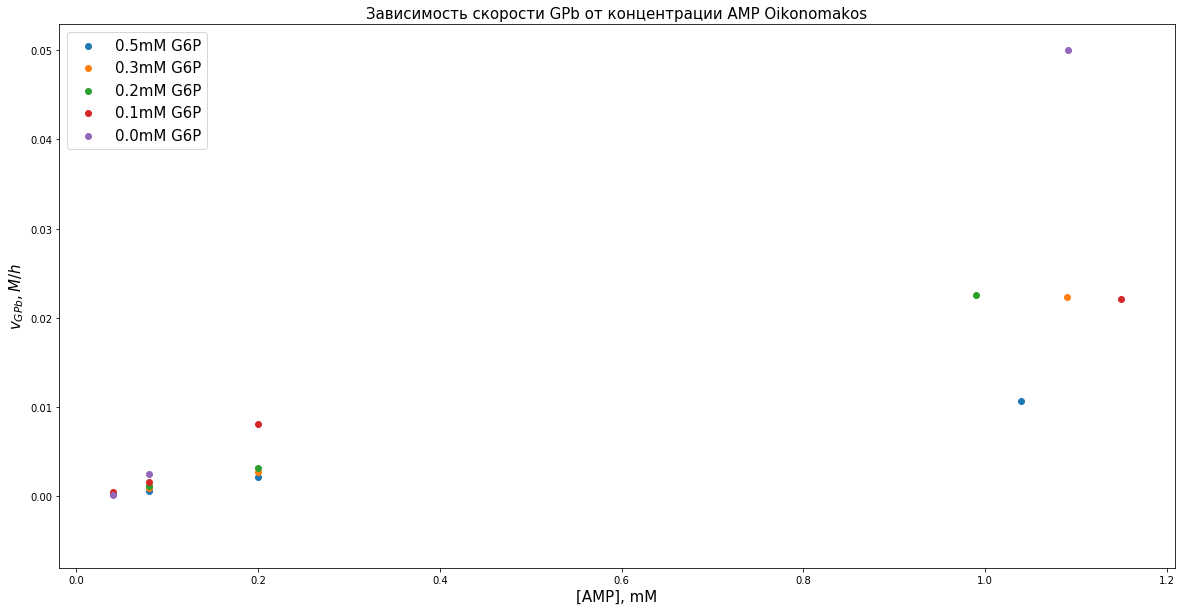

In [33]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.scatter(v_amp_oi_05g6p['amp'],v_amp_oi_05g6p['v'])
plt.scatter(v_amp_oi_03g6p['amp'],v_amp_oi_03g6p['v'])
plt.scatter(v_amp_oi_02g6p['amp'],v_amp_oi_02g6p['v'])
plt.scatter(v_amp_oi_01g6p['amp'],v_amp_oi_01g6p['v'])
plt.scatter(v_amp_oi_00g6p['amp'],v_amp_oi_00g6p['v'])
plt.xlabel('[AMP], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('0.5mM G6P','0.3mM G6P', '0.2mM G6P', '0.1mM G6P', '0.0mM G6P'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации AMP Oikonomakos', fontsize = 15)
plt.show()

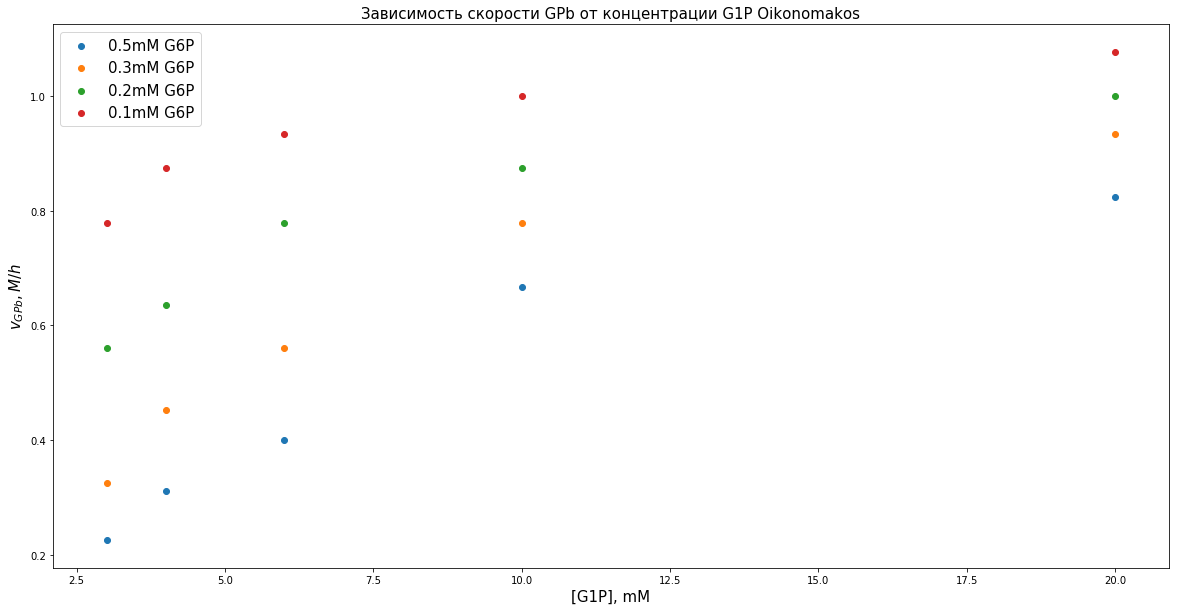

In [34]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.scatter(v_g1p_oi_3g6p['g1p'],v_g1p_oi_3g6p['v'])
plt.scatter(v_g1p_oi_2g6p['g1p'],v_g1p_oi_2g6p['v'])
plt.scatter(v_g1p_oi_08g6p['g1p'],v_g1p_oi_08g6p['v'])
plt.scatter(v_g1p_oi_00g6p['g1p'],v_g1p_oi_00g6p['v'])
#plt.scatter(v_oi_00g6p['amp'],v_oi_00g6p['v'])
plt.xlabel('[G1P], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('0.5mM G6P','0.3mM G6P', '0.2mM G6P', '0.1mM G6P'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации G1P Oikonomakos', fontsize = 15)
plt.show()

## Madsen

In [35]:
v_amp_m_0atp = pd.DataFrame(data = {'amp' : [0.00,0.02,0.04,0.06,0.09,0.26,0.79],'v' : [0.00,0.07,0.17,0.33,0.40,0.71,0.84]})
v_amp_m_7_6atp = pd.DataFrame(data = {'amp' : [0.02,0.04,0.07,0.09,0.27,0.78],'v' : [0.01,0.04,0.08,0.11,0.39,0.65]})
v_amp_m_9atp = pd.DataFrame(data = {'amp' : [0.02,0.03,0.05,0.19,0.36,0.34],'v' : [0.03,0.04,0.08,0.39,0.63,0.54]})

In [36]:
v_g1p_m_0atp = pd.DataFrame(data = {'g1p' : [4.24,8.51,16.99,27.32],'v' : [0.53,0.67,0.79,0.89]})
v_g1p_m_10atp = pd.DataFrame(data = {'g1p' : [5.92,8.18,11.98,12.13,19.03,18.76,25.54,25.26,38.37,38.24,50.78,50.78,81.77,81.50],'v' : [0.05,0.08,0.05,0.14,0.17,0.24,0.36,0.39,0.53,0.56,0.62,0.65,0.78,0.83,]})

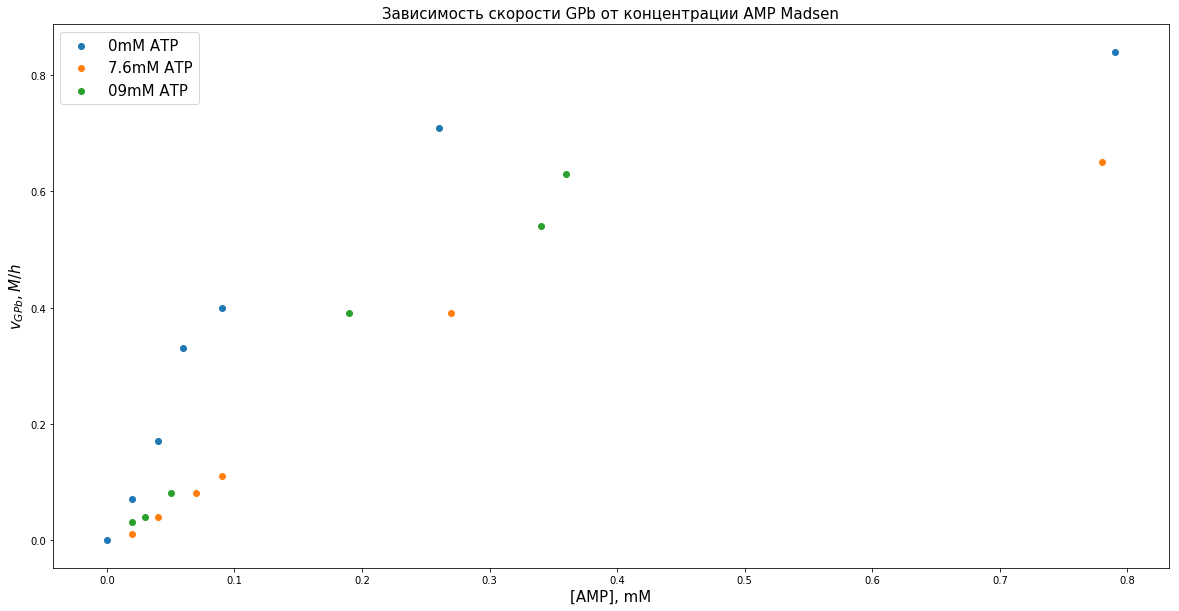

In [37]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.scatter(v_amp_m_0atp['amp'],v_amp_m_0atp['v'])
plt.scatter(v_amp_m_7_6atp['amp'],v_amp_m_7_6atp['v'])
plt.scatter(v_amp_m_9atp['amp'],v_amp_m_9atp['v'])
#plt.scatter(v_oi_00g6p['amp'],v_oi_00g6p['v'])
plt.xlabel('[AMP], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('0mM ATP','7.6mM ATP', '09mM ATP'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации AMP Madsen', fontsize = 15)
plt.show()

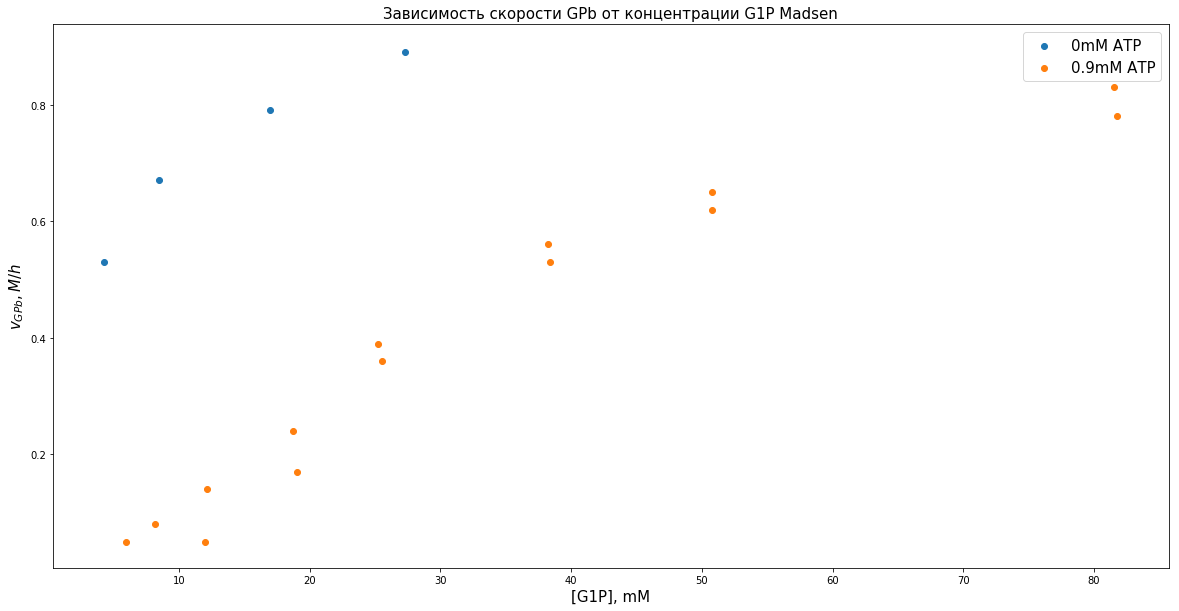

In [38]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.scatter(v_g1p_m_0atp['g1p'],v_g1p_m_0atp['v'])
plt.scatter(v_g1p_m_10atp['g1p'],v_g1p_m_10atp['v'])
#plt.scatter(v_oi_00g6p['amp'],v_oi_00g6p['v'])
plt.xlabel('[G1P], mM', fontsize = 15)
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('0mM ATP', '0.9mM ATP'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации G1P Madsen', fontsize = 15)
plt.show()

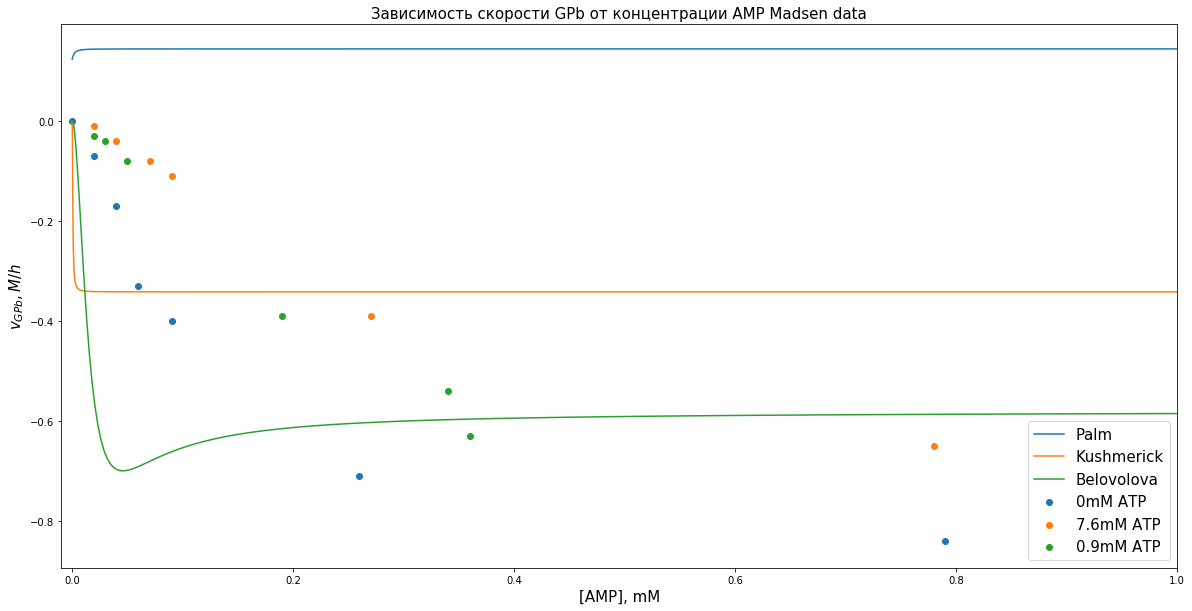

In [39]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(amp_all,V_palm_amp)
plt.plot(amp_all,V_kush_amp)
plt.plot(amp_all, V_bel_amp)
plt.scatter(v_amp_m_0atp['amp'],-1 * v_amp_m_0atp['v'])
plt.scatter(v_amp_m_7_6atp['amp'],-1 * v_amp_m_7_6atp['v'])
plt.scatter(v_amp_m_9atp['amp'],-1 * v_amp_m_9atp['v'])
plt.xlabel('[AMP], mM', fontsize = 15)
plt.xlim([-0.01, 1])
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('Palm','Kushmerick', 'Belovolova', '0mM ATP','7.6mM ATP', '0.9mM ATP'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации AMP Madsen data', fontsize = 15)
plt.show()

model parameters : [atp] = [0:10]mM, [g1p] = 24mM, [g6p] = 0.2mM
Experiment parameters: [atp] = 0, 7.6, 0.9 mM, [g1p] = 24mM

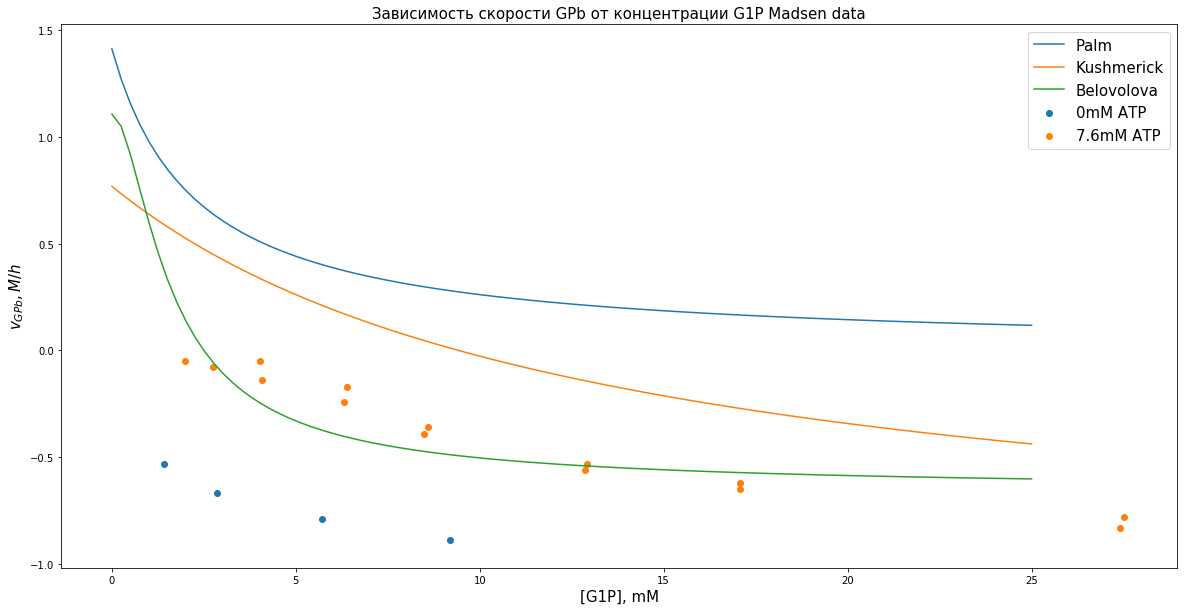

In [40]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(G1P_all,V_palm_g1p)
plt.plot(G1P_all,V_kush_g1p)
plt.plot(G1P_all, V_bel_g1p)
plt.scatter(v_g1p_m_0atp['g1p']/11*3.7,-1 * v_g1p_m_0atp['v'])
plt.scatter(v_g1p_m_10atp['g1p']/11*3.7,-1 * v_g1p_m_10atp['v'])
plt.xlabel('[G1P], mM', fontsize = 15)
#plt.xlim([-0.01, 1])
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('Palm','Kushmerick', 'Belovolova', '0mM ATP','7.6mM ATP', '0.9mM ATP'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации G1P Madsen data', fontsize = 15)
plt.show()
#/11*0.0036

model parameters : [atp] = 7.6mM, [g1p] = 0:24mM, [g6p] = 0.2mM
Experiment parameters: [atp] = 0, 7.6mM, [g1p] = 0:24mM

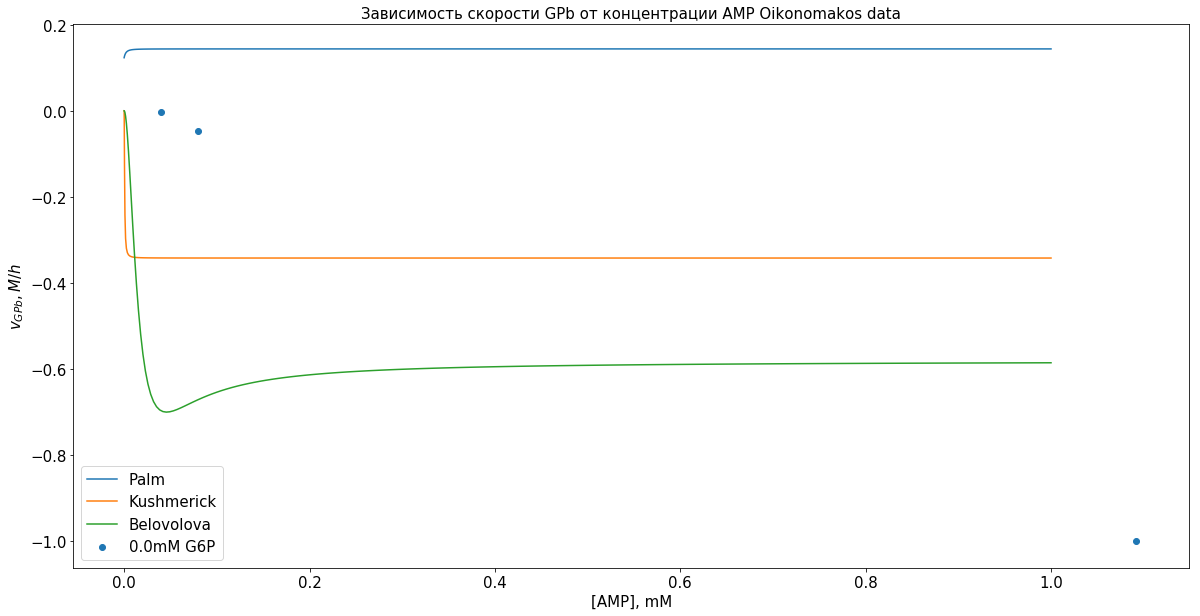

In [41]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(amp_all,V_palm_amp)
plt.plot(amp_all,V_kush_amp)
plt.plot(amp_all, V_bel_amp)
plt.scatter(v_amp_oi_00g6p['amp'],-1 * v_amp_oi_00g6p['v']/(max(v_amp_oi_00g6p['v'])))
#plt.scatter(v_amp_oi_05g6p['amp'],-1 * v_amp_oi_05g6p['v']/(max(v_amp_oi_05g6p['v'])))
#plt.scatter(v_amp_oi_03g6p['amp'],-1 * v_amp_oi_03g6p['v']/(max(v_amp_oi_03g6p['v'])))
#plt.scatter(v_amp_oi_02g6p['amp'],-1 * v_amp_oi_02g6p['v']/(max(v_amp_oi_02g6p['v'])))
#plt.scatter(v_amp_oi_01g6p['amp'],-1 * v_amp_oi_01g6p['v']/(max(v_amp_oi_01g6p['v'])))
plt.xlabel('[AMP], mM', fontsize = 15)
#plt.xlim([-0.01, 1])
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('Palm','Kushmerick', 'Belovolova', '0.0mM G6P','0.3mM G6P', '0.5mM G6P', '0.1mM G6P'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации AMP Oikonomakos data', fontsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#### model parameters : [atp] = 0mM, [amp] = 1mM,  [g1p] = 20mM, [g6p] = 0.0mM
#### Experiment parameters: [atp] = 0mM, [g1p] = 20mM, [amp] = 1mM

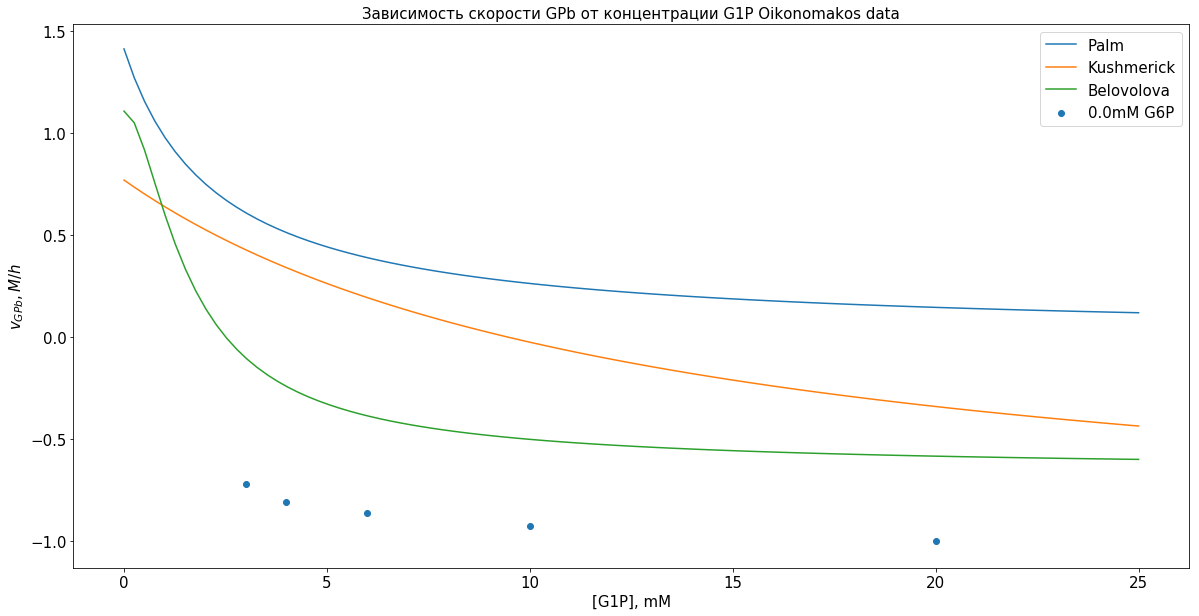

In [42]:
plt.figure(figsize = (20,10))
#for ix, P in enumerate(pool[:2]): # pool = 2 and 5 mM

plt.plot(G1P_all,V_palm_g1p)
plt.plot(G1P_all,V_kush_g1p)
plt.plot(G1P_all,V_bel_g1p)
#plt.scatter(v_g1p_oi_3g6p['g1p'],-1 * v_g1p_oi_3g6p['v']/(max(v_g1p_oi_3g6p['v'])))
#plt.scatter(v_g1p_oi_2g6p['g1p'],-1 * v_g1p_oi_2g6p['v']/(max(v_g1p_oi_2g6p['v'])))
#plt.scatter(v_g1p_oi_08g6p['g1p'],-1 * v_g1p_oi_08g6p['v']/(max(v_g1p_oi_08g6p['v'])))
plt.scatter(v_g1p_oi_00g6p['g1p'],-1 * v_g1p_oi_00g6p['v']/(max(v_g1p_oi_00g6p['v'])))
plt.xlabel('[G1P], mM', fontsize = 15)
#plt.xlim([-0.01, 1])
plt.ylabel('$v_{GPb}, M/h$', fontsize = 15)
plt.legend(('Palm','Kushmerick', 'Belovolova', '0.0mM G6P','2mM G6P', '0.8mM G6P', '0.0mM G6P'), fontsize = 15)
plt.title('Зависимость скорости GPb от концентрации G1P Oikonomakos data', fontsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#### model parameters : [atp] = 0mM, [amp] = 1mM,  [g1p] = 0:20mM, [g6p] = 0.0mM
#### Experiment parameters: [atp] = 0mM, [amp] = 1mM, [g6p] = 0.0mM